# 举例：我们用目标函数 y=sin2πx , 加上一个正态分布的噪音干扰，用多项式去拟合【例1.1 11页】

In [2]:
import numpy as np
import scipy as sp
from scipy.optimize import leastsq
import matplotlib.pyplot as plt
%matplotlib inline

numpy.poly1d([1,2,3]) 生成  $1x^2+2x^1+3x^0$*

In [3]:
# 目标函数
def real_func(x):
    return np.sin(2*np.pi*x)

# 多项式
def fit_func(p, x):
    f = np.poly1d(p)
    return f(x)

# 残差
def residuals_func(p, x, y):
    ret = fit_func(p, x) - y
    return ret

In [8]:
# 十个点
x = np.linspace(0, 1, 10)
x_points = np.linspace(0, 1, 1000)
# 加上正态分布噪音的目标函数的值
y_ = real_func(x)
y = [np.random.normal(0, 0.1) + y1 for y1 in y_]

def fitting(M=0):
    """
    M    为 多项式的次数
    """
    # 随机初始化多项式参数
    p_init = np.random.rand(M + 1)
    # 最小二乘法
    p_lsq = leastsq(residuals_func, p_init, args=(x, y))
    print('Fitting Parameters:', p_lsq[0])

    # 可视化
    plt.plot(x_points, real_func(x_points), label='real')
    plt.plot(x_points, fit_func(p_lsq[0], x_points), label='fitted curve')
    plt.plot(x, y, 'bo', label='noise')
    plt.legend()
    return p_lsq

## M = 0

Fitting Parameters: [-0.04186183]


(array([-0.04186183]), 1)

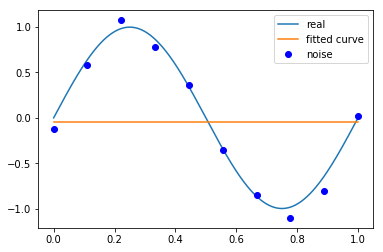

In [14]:
fitting()

## M = 1

Fitting Parameters: [-1.35711318  0.63669476]


(array([-1.35711318,  0.63669476]), 1)

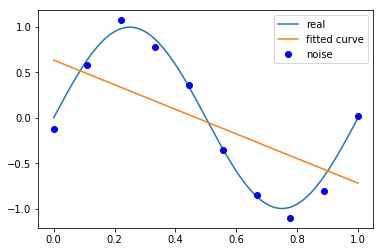

In [10]:
fitting(M=1)

## M = 3

Fitting Parameters: [ 22.83765871 -34.53685882  11.92098681  -0.19429159]


(array([ 22.83765871, -34.53685882,  11.92098681,  -0.19429159]), 1)

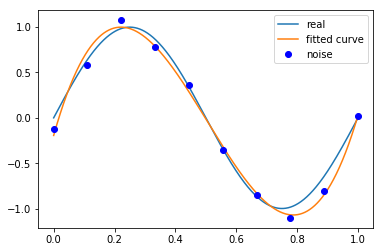

In [11]:
fitting(M=3)

## M = 9

Fitting Parameters: [-2.02102720e+04  9.25954334e+04 -1.78832996e+05  1.89238210e+05
 -1.19291415e+05  4.55431989e+04 -1.01729109e+04  1.17690637e+03
 -4.60044260e+01 -1.27458321e-01]


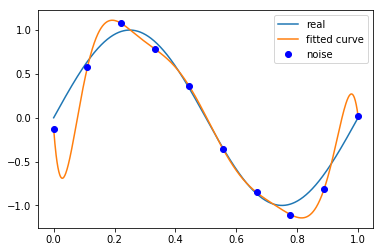

In [22]:
p_lsq_9 = fitting(M=9)

# 正则化

In [15]:
regularization = 0.0001


def residuals_func_regularization(p, x, y):
    ret = fit_func(p, x) - y
    ret = np.append(ret,
                    np.sqrt(0.5 * regularization * np.square(p)))  # L2范数作为正则化项
    return ret

In [24]:
# 最小二乘法,加正则化项
p_init = np.random.rand(9 + 1)
print(p_init)
p_lsq_regularization = leastsq(
    residuals_func_regularization, p_init, args=(x, y))

[0.2611335  0.96460234 0.10547499 0.62239732 0.34865233 0.39514817
 0.4002844  0.97884269 0.22411288 0.92216842]


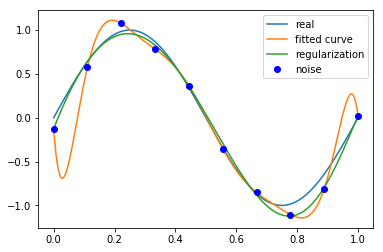

In [23]:
plt.plot(x_points, real_func(x_points), label='real')
plt.plot(x_points, fit_func(p_lsq_9[0], x_points), label='fitted curve')
plt.plot(
    x_points,
    fit_func(p_lsq_regularization[0], x_points),
    label='regularization')
plt.plot(x, y, 'bo', label='noise')
plt.legend()